In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
num_classes = 10
input_shape = (28, 28, 1)

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
x_train.shape

(60000, 28, 28, 1)

In [6]:
print(f"Training Images: {len(x_train)}")
print(f"Training Labels: {len(y_train)}")
print(f"Testing Images: {len(x_test)}")
print(f"Testing Labels: {len(y_test)}")

Training Images: 60000
Training Labels: 60000
Testing Images: 10000
Testing Labels: 10000


In [7]:
dense_model=keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(25,activation="relu"),
        layers.Dense(50,activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
dense_model.summary()
dense_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 25)                19625     
                                                                 
 dense_1 (Dense)             (None, 50)                1300      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 21435 (83.73 KB)
Trainable params: 21435 (83.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
cnn_model=keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
cnn_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 10)               

In [9]:
batch_size = 128
epochs = 50

In [10]:
dense_history=dense_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/50
422/422 [==============================] - 7s 4ms/step - loss: 0.5393 - accuracy: 0.8507 - val_loss: 0.2168 - val_accuracy: 0.9397
Epoch 2/50
422/422 [==============================] - 2s 5ms/step - loss: 0.2354 - accuracy: 0.9329 - val_loss: 0.1600 - val_accuracy: 0.9585
Epoch 3/50
422/422 [==============================] - 2s 5ms/step - loss: 0.1872 - accuracy: 0.9454 - val_loss: 0.1361 - val_accuracy: 0.9632
Epoch 4/50
422/422 [==============================] - 2s 4ms/step - loss: 0.1565 - accuracy: 0.9543 - val_loss: 0.1246 - val_accuracy: 0.9655
Epoch 5/50
422/422 [==============================] - 2s 4ms/step - loss: 0.1380 - accuracy: 0.9593 - val_loss: 0.1215 - val_accuracy: 0.9647
Epoch 6/50
422/422 [==============================] - 2s 4ms/step - loss: 0.1226 - accuracy: 0.9636 - val_loss: 0.1189 - val_accuracy: 0.9668
Epoch 7/50
422/422 [==============================] - 2s 4ms/step - loss: 0.1116 - accuracy: 0.9674 - val_loss: 0.1104 - val_accuracy: 0.9708
Epoch 

In [11]:
cnn_history=cnn_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/50
422/422 [==============================] - 12s 10ms/step - loss: 0.2943 - accuracy: 0.9144 - val_loss: 0.0764 - val_accuracy: 0.9770
Epoch 2/50
422/422 [==============================] - 2s 5ms/step - loss: 0.0783 - accuracy: 0.9755 - val_loss: 0.0595 - val_accuracy: 0.9818
Epoch 3/50
422/422 [==============================] - 2s 5ms/step - loss: 0.0567 - accuracy: 0.9824 - val_loss: 0.0519 - val_accuracy: 0.9853
Epoch 4/50
422/422 [==============================] - 2s 5ms/step - loss: 0.0466 - accuracy: 0.9858 - val_loss: 0.0482 - val_accuracy: 0.9860
Epoch 5/50
422/422 [==============================] - 2s 5ms/step - loss: 0.0387 - accuracy: 0.9878 - val_loss: 0.0435 - val_accuracy: 0.9885
Epoch 6/50
422/422 [==============================] - 2s 5ms/step - loss: 0.0343 - accuracy: 0.9896 - val_loss: 0.0434 - val_accuracy: 0.9878
Epoch 7/50
422/422 [==============================] - 2s 6ms/step - loss: 0.0302 - accuracy: 0.9907 - val_loss: 0.0441 - val_accuracy: 0.9872
Epoc

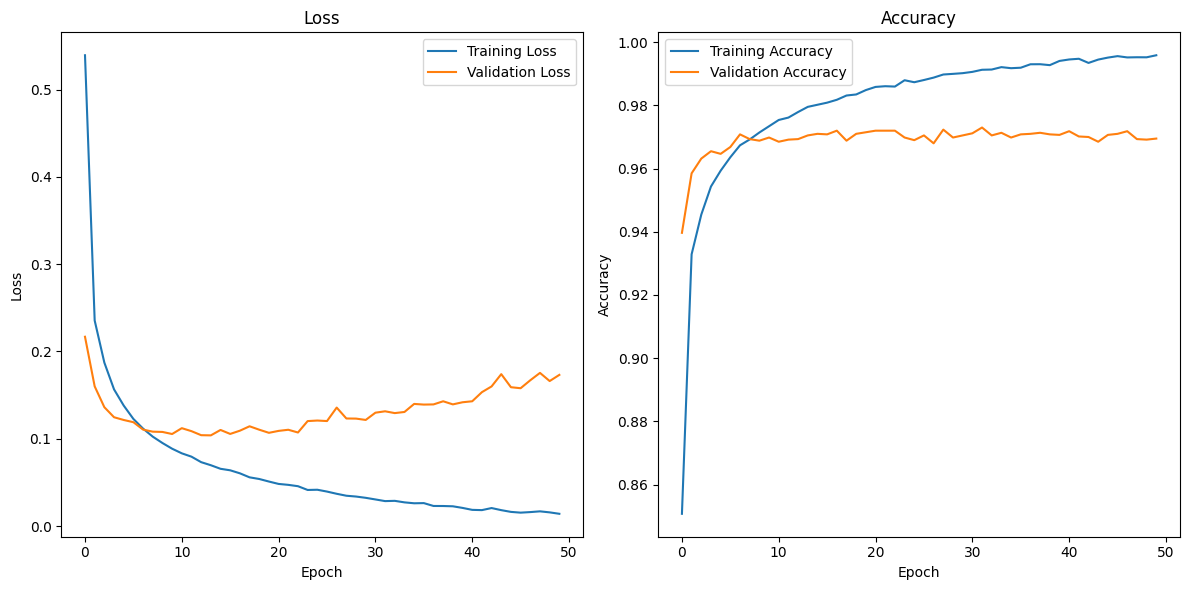

In [12]:
import matplotlib.pyplot as plt

# Assuming you have already trained the model and stored the history in 'dense_history'

# Plot training loss and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(dense_history.history['loss'], label='Training Loss')
plt.plot(dense_history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(dense_history.history['accuracy'], label='Training Accuracy')
plt.plot(dense_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

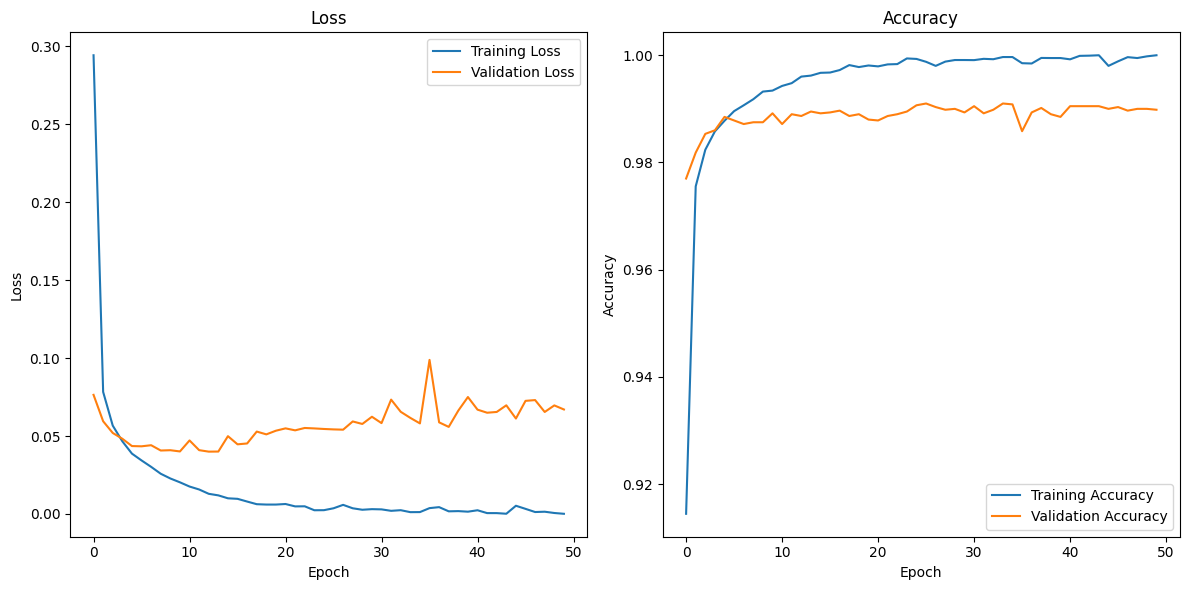

In [13]:
import matplotlib.pyplot as plt

# Assuming you have already trained the model and stored the history in 'dense_history'

# Plot training loss and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()